group tasks:
<ul>
<li>Find if there is a correlation between the price of the apps and the category (Teen, Everyone, Mature).</li>
<li>find the sentiment of all apps using np files and "afinn" lib</li>
<li>for paid apps only list the top 5 highest and lowest sentiment numbers with the name of the app and the app category</li>
<li>what is the best category according to sentiment values</li>
</ul>

In [2]:
!pip install afinn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 KB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=ef7efd34e5a9140ee1c59df2be9282c3b2969e9d295b11308be474d97b0b222b
  Stored in directory: /root/.cache/pip/wheels/f6/6f/c3/b305c5107a17618f2938a067d5ffcbb556909d82398762089e
Successfully built afinn


In [3]:
import pandas as pd

ps = pd.read_csv('https://raw.githubusercontent.com/ufukcanadanir/playstore_db_team_1/main/cleaned_playstore.csv')
psr = pd.read_csv('https://raw.githubusercontent.com/ufukcanadanir/playstore_db_team_1/main/cleaned_playstore_reviews.csv')

n = pd.read_excel('https://github.com/ufukcanadanir/playstore_db_team_1/blob/main/n.xlsx?raw=true')
p = pd.read_excel('https://github.com/ufukcanadanir/playstore_db_team_1/blob/main/p.xlsx?raw=true')

ps.drop(columns=['Unnamed: 0'], inplace = True)
psr.drop(columns=['Unnamed: 0'], inplace = True)


In [ ]:
psr.head(7)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Great,Positive,0.800000,0.750000
2,11st,Horrible ID verification,Negative,-1.000000,1.000000
3,1800 Contacts - Lens Store,Great hassle free way order contacts. Got call...,Positive,0.600000,0.775000
4,1LINE – One Line with One Touch,"gets 1* there's ad every single level restart,...",Negative,-0.157143,0.704762
5,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,Like The Old Version Better Where Backspace Is...,Positive,0.300000,0.350000
6,21-Day Meditation Experience,Terrible! Not user-friendly like original app....,Negative,-0.265625,0.875000


# Find if there is a correlation between the price of the apps and the category (Teen, Everyone, Mature).

In [ ]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   float64
 4   Size            9659 non-null   float64
 5   Installs        9659 non-null   float64
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9659 non-null   object 
 12  Android Ver     9659 non-null   object 
dtypes: float64(5), object(8)
memory usage: 981.1+ KB


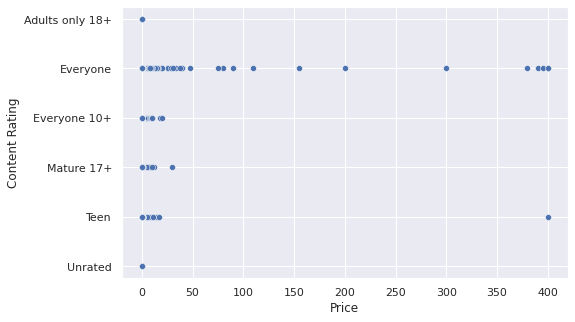

In [4]:
import seaborn as sns

sns.set(rc={'figure.figsize':(8,5)})

ps["Content Rating"] = ps["Content Rating"].astype("category")

sns.scatterplot(data=ps, x="Price", y="Content Rating")

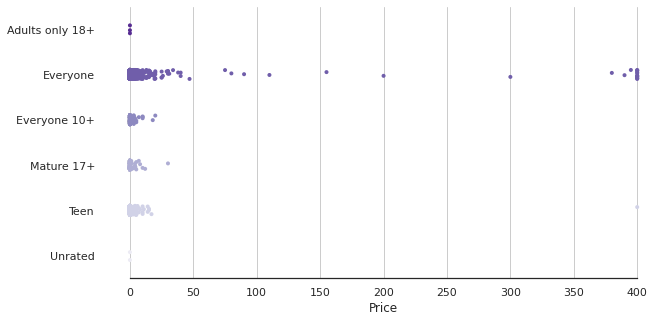

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white", palette=None)

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 5))

# Add in points to show each observation
sns.stripplot(x="Price", y="Content Rating", data=ps, size=4, color=".3", linewidth=0, palette="Purples_r")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


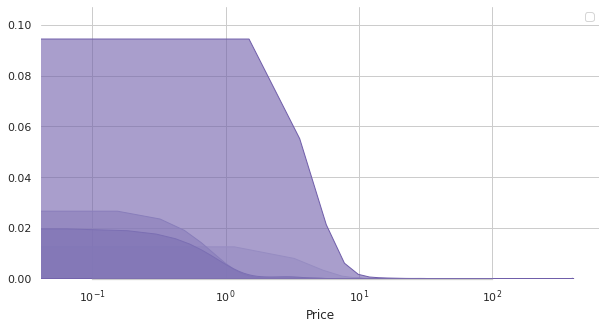

In [ ]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 5))

# Dark2 Purples_r. autumn
sns.kdeplot(data=ps, x="Price", hue="Content Rating", fill=True,  common_norm=False, alpha=0.6, palette="Purples_r")
plt.xscale('log')

ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)
ax.legend()

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


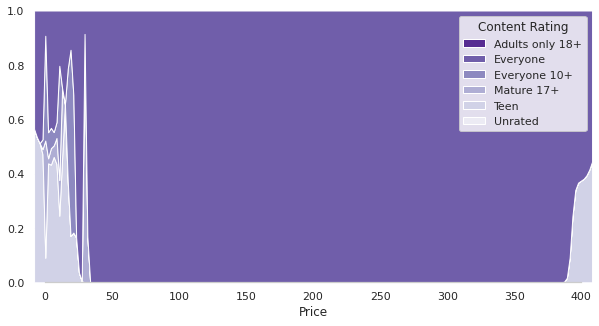

In [ ]:
f, ax = plt.subplots(figsize=(10, 5))
sns.kdeplot(data=ps, x="Price", hue="Content Rating", common_norm=False, palette="Purples_r", multiple="fill", alpha=1)

ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [ ]:
labels = ps["Content Rating"].astype("category").cat.categories.tolist()
replace_map_comp = {'Content Rating' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

psEnum = ps.replace(replace_map_comp)
psEnum.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,1.900000e+07,10000.0,Free,0.0,2,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,1.400000e+07,500000.0,Free,0.0,2,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.700000e+06,5000000.0,Free,0.0,2,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,2.500000e+07,50000000.0,Free,0.0,5,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.800000e+06,100000.0,Free,0.0,2,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


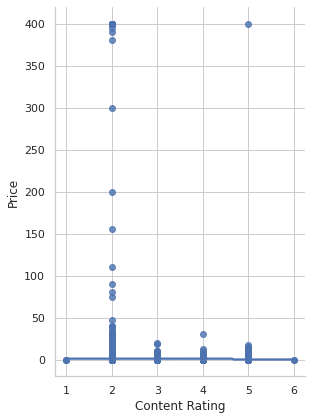

In [ ]:
sns.set_theme(style="whitegrid")

g = sns.lmplot(x="Content Rating", y="Price", data=psEnum,
               palette="Purples_r", logistic=True, height=6, aspect=.75 )

In [ ]:

psEnum["Price"].corr(psEnum["Content Rating"])

-0.014487939922676335

In [ ]:
from scipy.stats import f_oneway

categories = ps.groupby(["Content Rating"])
prices = [frame["Price"] for name, frame in categories]

f_oneway(*prices)

F_onewayResult(statistic=0.5528435874888571, pvalue=0.7362752470096219)

Since the p-value is not less than 0.05 hence we could not reject the null hypothesis<a href="https://en.wikipedia.org/wiki/F-test#One-way_ANOVA_example"> (see)</a>. This implies that we do not have sufficient proof to say that there exists a difference in the prices among different categories. (at the %5 level of significance)

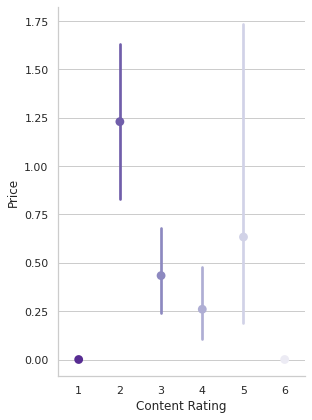

In [ ]:
sns.set_theme(style="whitegrid")

sns.catplot(
    x="Content Rating", y="Price", data=psEnum,
     palette="Purples_r", errorbar="se",
    kind="point", height=6, aspect=.75,
)
g.despine(left=True)

In [6]:

paidonly = [df.where(df > 0).dropna() for df in prices if len(df.where(df > 0).dropna()) > 0]
f_oneway(*paidonly)

NameError: ignored

In [7]:
{name: len(frame) for name, frame in categories}

NameError: ignored

# find the sentiment of all apps using np files and "afinn" lib

In [8]:
from afinn import Afinn

afinn = Afinn()
afinn_dict = afinn._dict

In [ ]:
psr

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Great,Positive,0.800000,0.750000
2,11st,Horrible ID verification,Negative,-1.000000,1.000000
3,1800 Contacts - Lens Store,Great hassle free way order contacts. Got call...,Positive,0.600000,0.775000
4,1LINE – One Line with One Touch,"gets 1* there's ad every single level restart,...",Negative,-0.157143,0.704762
...,...,...,...,...,...
636,Hotels Combined - Cheap deals,Totally unimpressed. We booking hotels Vietnam...,Negative,-0.083333,0.427778
637,Hotels.com: Book Hotel Rooms & Find Vacation D...,Bookings stopped showing app. Helpline useless...,Positive,0.291667,0.566667
638,Hotspot Shield Free VPN Proxy & Wi-Fi Security,7 days free trial asking credit card. Stupid!!!,Negative,-0.300000,0.900000
639,Hotstar,running,Neutral,0.000000,0.000000


In [9]:
psr = psr.assign(custom = psr.Sentiment_Polarity)

for i, review in enumerate(psr["Translated_Review"]):

  score = 0.0
  wordList = review.split(" ")
  
  for w in wordList:
    
    w = ''.join(filter(str.isalpha, w))

    if w in p.values:
      score += 1

    if w in n.values:
      score -= 1

  psr.loc[i,"custom"] = score



In [ ]:
# conda install -c conda-forge  airflow
#afinn.score('This is utterly excellent!')
psr

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,custom
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333,2.0
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Great,Positive,0.800000,0.750000,0.0
2,11st,Horrible ID verification,Negative,-1.000000,1.000000,0.0
3,1800 Contacts - Lens Store,Great hassle free way order contacts. Got call...,Positive,0.600000,0.775000,0.0
4,1LINE – One Line with One Touch,"gets 1* there's ad every single level restart,...",Negative,-0.157143,0.704762,-1.0
...,...,...,...,...,...,...
636,Hotels Combined - Cheap deals,Totally unimpressed. We booking hotels Vietnam...,Negative,-0.083333,0.427778,-1.0
637,Hotels.com: Book Hotel Rooms & Find Vacation D...,Bookings stopped showing app. Helpline useless...,Positive,0.291667,0.566667,-1.0
638,Hotspot Shield Free VPN Proxy & Wi-Fi Security,7 days free trial asking credit card. Stupid!!!,Negative,-0.300000,0.900000,1.0
639,Hotstar,running,Neutral,0.000000,0.000000,0.0


In [10]:
psr["affin"] = psr.Translated_Review.apply(lambda x: afinn.score(x))

In [11]:
psr.groupby("App")["affin"].mean()
psr

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,custom,affin
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333,2.0,13.0
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Great,Positive,0.800000,0.750000,0.0,3.0
2,11st,Horrible ID verification,Negative,-1.000000,1.000000,0.0,-3.0
3,1800 Contacts - Lens Store,Great hassle free way order contacts. Got call...,Positive,0.600000,0.775000,0.0,4.0
4,1LINE – One Line with One Touch,"gets 1* there's ad every single level restart,...",Negative,-0.157143,0.704762,-1.0,-2.0
...,...,...,...,...,...,...,...
636,Hotels Combined - Cheap deals,Totally unimpressed. We booking hotels Vietnam...,Negative,-0.083333,0.427778,-1.0,-3.0
637,Hotels.com: Book Hotel Rooms & Find Vacation D...,Bookings stopped showing app. Helpline useless...,Positive,0.291667,0.566667,-1.0,-2.0
638,Hotspot Shield Free VPN Proxy & Wi-Fi Security,7 days free trial asking credit card. Stupid!!!,Negative,-0.300000,0.900000,1.0,-1.0
639,Hotstar,running,Neutral,0.000000,0.000000,0.0,0.0


In [12]:
psr.groupby("App")["Sentiment_Polarity"].mean().corr(psr.groupby("App")["custom"].mean())

0.36493102625120977

In [13]:
psr.groupby("App")["Sentiment_Polarity"].mean().corr(psr.groupby("App")["affin"].mean())

0.45762437301536474

# for paid apps only list the top 5 highest and lowest sentiment numbers with the name of the app and the app category

In [14]:
len(pd.unique(psr['App']))

641

In [15]:
afinndf = psr.groupby("App")["affin"].mean()
afinndf = pd.DataFrame(afinndf)
best = ps.join(afinndf, on='App')
best.dropna(subset=['affin'], inplace=True)
best = best[best.Price > 0]
best

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affin
1492,Farming Simulator 18,GAME,4.5,18125.0,1.500000e+07,100000.0,Paid,4.99,Everyone,Simulation;Education,2018-07-09,Varies with device,4.4 and up,-3.0
1494,Call of Duty:Black Ops Zombies,GAME,4.2,13004.0,4.600000e+07,100000.0,Paid,6.99,Teen,Action,2016-12-20,1.0.11,2.3.3 and up,3.0
1754,Essential Anatomy 3,MEDICAL,4.1,1533.0,4.200000e+07,50000.0,Paid,11.99,Mature 17+,Medical,2014-08-07,1.1.3,4.0.3 and up,12.0
1761,Diabetes & Diet Tracker,MEDICAL,4.6,395.0,1.900000e+07,1000.0,Paid,9.99,Everyone,Medical,2018-07-16,6.5.1,5.0 and up,-4.0
2375,Golfshot Plus: Golf GPS,SPORTS,4.1,3387.0,2.500000e+07,50000.0,Paid,29.99,Everyone,Sports,2018-07-11,4.18.0,4.1 and up,0.0
2673,Beautiful Widgets Pro,PERSONALIZATION,4.2,97890.0,1.400000e+07,1000000.0,Paid,2.49,Everyone,Personalization,2016-08-24,5.7.8,2.3 and up,6.0
2675,HD Widgets,PERSONALIZATION,4.3,58617.0,2.600000e+07,1000000.0,Paid,0.99,Everyone,Personalization,2016-12-07,4.3.2,4.4 and up,6.0
2707,BIG Launcher,PERSONALIZATION,4.3,881.0,5.900000e+06,10000.0,Paid,9.99,Everyone,Personalization,2018-06-20,2.5.9,2.1 and up,6.0


## Top 5 apps with lowest sentiment values

In [16]:
best.sort_values(by=['affin'],ascending=True)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affin
1761,Diabetes & Diet Tracker,MEDICAL,4.6,395.0,1.900000e+07,1000.0,Paid,9.99,Everyone,Medical,2018-07-16,6.5.1,5.0 and up,-4.0
1492,Farming Simulator 18,GAME,4.5,18125.0,1.500000e+07,100000.0,Paid,4.99,Everyone,Simulation;Education,2018-07-09,Varies with device,4.4 and up,-3.0
2375,Golfshot Plus: Golf GPS,SPORTS,4.1,3387.0,2.500000e+07,50000.0,Paid,29.99,Everyone,Sports,2018-07-11,4.18.0,4.1 and up,0.0
1494,Call of Duty:Black Ops Zombies,GAME,4.2,13004.0,4.600000e+07,100000.0,Paid,6.99,Teen,Action,2016-12-20,1.0.11,2.3.3 and up,3.0
2673,Beautiful Widgets Pro,PERSONALIZATION,4.2,97890.0,1.400000e+07,1000000.0,Paid,2.49,Everyone,Personalization,2016-08-24,5.7.8,2.3 and up,6.0
2675,HD Widgets,PERSONALIZATION,4.3,58617.0,2.600000e+07,1000000.0,Paid,0.99,Everyone,Personalization,2016-12-07,4.3.2,4.4 and up,6.0
2707,BIG Launcher,PERSONALIZATION,4.3,881.0,5.900000e+06,10000.0,Paid,9.99,Everyone,Personalization,2018-06-20,2.5.9,2.1 and up,6.0
1754,Essential Anatomy 3,MEDICAL,4.1,1533.0,4.200000e+07,50000.0,Paid,11.99,Mature 17+,Medical,2014-08-07,1.1.3,4.0.3 and up,12.0


In [17]:
top5 = best.sort_values(by=['affin'],ascending=True).head(5)
top5 =top5[['App','Category','affin']]
top5

,App,Category,affin
1761,Diabetes & Diet Tracker,MEDICAL,-4.0
1492,Farming Simulator 18,GAME,-3.0
2375,Golfshot Plus: Golf GPS,SPORTS,0.0
1494,Call of Duty:Black Ops Zombies,GAME,3.0
2673,Beautiful Widgets Pro,PERSONALIZATION,6.0


## Top 5 apps with highest sentiment values

In [18]:
low5 = best.sort_values(by=['affin'],ascending=False).head(5)
low5 =low5[['App','Category','affin']]
low5

,App,Category,affin
1754,Essential Anatomy 3,MEDICAL,12.0
2673,Beautiful Widgets Pro,PERSONALIZATION,6.0
2675,HD Widgets,PERSONALIZATION,6.0
2707,BIG Launcher,PERSONALIZATION,6.0
1494,Call of Duty:Black Ops Zombies,GAME,3.0


# what is the best category according to sentiment values

In [21]:
afinndf = psr.groupby("App")["affin"].sum()
afinndf=pd.DataFrame(afinndf)
best = ps.join(afinndf, on='App')
best.dropna(subset=['affin'], inplace=True)
#best.groupby('Category')['affin'].mean()
best_category_accto_sent_values= best.groupby('Category')['affin'].sum().sort_values(ascending=False)

In [22]:
best_category_accto_sent_values

Category
GAME                   490.0
HEALTH_AND_FITNESS     168.0
FAMILY                 160.0
MEDICAL                141.0
ENTERTAINMENT          129.0
TRAVEL_AND_LOCAL       117.0
COMMUNICATION          116.0
PERSONALIZATION        106.0
EDUCATION              102.0
PRODUCTIVITY            91.0
FINANCE                 87.0
SPORTS                  84.0
PHOTOGRAPHY             83.0
DATING                  81.0
TOOLS                   58.0
LIFESTYLE               57.0
BOOKS_AND_REFERENCE     49.0
LIBRARIES_AND_DEMO      46.0
SOCIAL                  46.0
NEWS_AND_MAGAZINES      38.0
ART_AND_DESIGN          34.0
FOOD_AND_DRINK          30.0
VIDEO_PLAYERS           23.0
EVENTS                  22.0
BUSINESS                21.0
HOUSE_AND_HOME          14.0
AUTO_AND_VEHICLES       14.0
SHOPPING                13.0
PARENTING                7.0
WEATHER                  7.0
COMICS                   3.0
BEAUTY                   2.0
MAPS_AND_NAVIGATION     -2.0
Name: affin, dtype: float64

In [ ]:
jj = pd.DataFrame(best_category_accto_sent_values)
#jj['Category'] = jj.index
jj = jj.reset_index()

In [ ]:
jj['Category'] = jj['Category'].str.replace('_', ' ').str.title()
jj

,Category,affin
0,Game,6.805556
1,Entertainment,6.142857
2,Education,6.000000
3,Health And Fitness,5.600000
4,Events,5.500000
5,Communication,5.272727
6,Libraries And Demo,5.111111
7,Medical,4.862069
8,Photography,4.611111
9,Family,4.324324


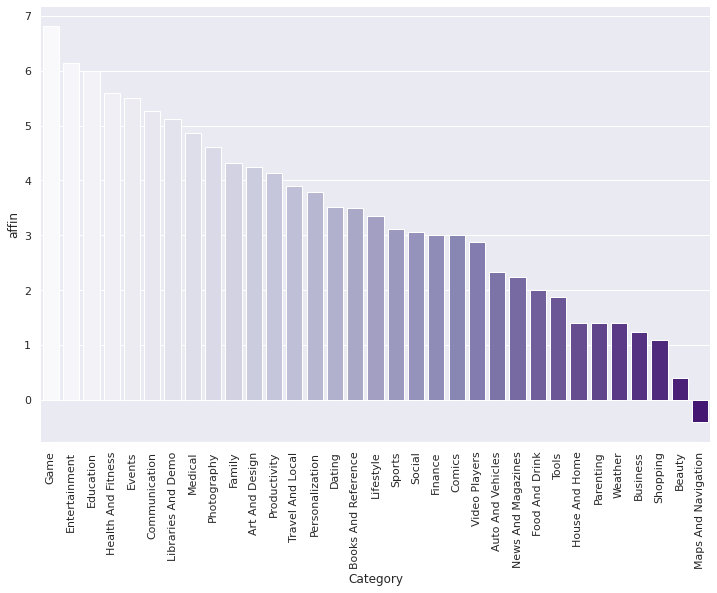

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})

sns.barplot(data = jj, x="Category", y="affin", palette="Purples")
plt.xticks(rotation=90)

ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)